## Investigating the Stroop Effect

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
# Load data from file into a dataframe
filename = 'C:/Users/securitycontrol/My Documents/WGU/C749/Project 2/stroopdata.csv'
stroop_df = pd.read_csv(filename)

**Question 1.** What is our independent variable? What is our dependent variable?

- Our **independent variable** is the type of congruency word condition the subject was tested on. Each subject was tested for both congruent word conditions and incongruent word conditions. 

- Our **dependent variable** is the time it takes to complete the congruency condition test.


**Question 2.** What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

- The **null hypothesis** is that there will be no significant difference between test times for congruent and incongruent conditions. 

>**H<sub>0</sub>: $\mu$<sub>C</sub> = $\mu$<sub>I</sub>** 
(where H<sub>0</sub> is the null hypothesis,
$\mu$<sub>C</sub> is the mean time for congruent tests, and
$\mu$<sub>I</sub> is the mean time for incongruent tests)

- The **alternative hypothesis** is that there will be a significant difference between test times for congruent and incongruent conditions

>**H<sub>A</sub>: $\mu$<sub>C</sub> 	$\neq$ $\mu$<sub>I</sub>**
(where H<sub>A</sub> is the alternative hypothesis,
$\mu$<sub>C</sub> is the mean time for congruent tests, and
$\mu$<sub>I</sub> is the mean time for incongruent tests)

- I will be conducting a dependent (paired) t-test on the dataset. There is one sample group that takes two tests (congruent and incongruent) and this type of analysis will allow us to see the difference between the means for each variable.  I chose to use a two-tailed test because we do not know which direction the means may vary, so I wanted to include both directions.  

- **Assumptions**
    1. The observations are independent of one another.
    2. The dependent variable is normally distributed.
    3. The dependent variable does not contain any outliers.
    4. The dependent variable is continuous.
 

**Question 3.** Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [3]:
##display the stroop_df
print(stroop_df)

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


In [4]:
##display measures of central tendency - the means
congruent_mean = stroop_df.Congruent.mean()
incongruent_mean = stroop_df.Incongruent.mean()
print("The mean of the congruent set is {0:.2f}.".format(congruent_mean))
print("The mean of the incongruent set is {0:.2f}.".format(incongruent_mean))

The mean of the congruent set is 14.05.
The mean of the incongruent set is 22.02.


In [5]:
##display a measure of variability - the standard deviations
congruent_std = stroop_df.Congruent.std()
incongruent_std = stroop_df.Incongruent.std()
print("The standard deviation of the congruent set is {0:.2f}.".format(congruent_std))
print("The standard deviation of the incongruent set is {0:.2f}.".format(incongruent_std))

The standard deviation of the congruent set is 3.56.
The standard deviation of the incongruent set is 4.80.


**Question 4.** Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

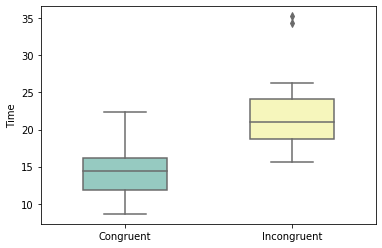

In [6]:
#Make a boxplot for both datasets
sns.boxplot(data=stroop_df[['Congruent', 'Incongruent']], width=.5, orient="v", palette="Set3");
plt.ylabel("Time");

- The box plots show the interquartile range of both datasets. The Congruent set having a mean around 14 and the Incongruent set having a mean around 22. The differences in time taken between these two sets it apparent. We also have two data points that would be outliers for the Incongruent dataset since they are well outside the box plot (around the 35 time mark). 

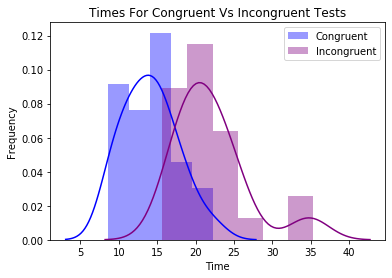

In [7]:
#Compare both datasets on a graph
sns.distplot(stroop_df['Congruent'], label = "Congruent", color = "blue")
sns.distplot(stroop_df['Incongruent'], label = "Incongruent", color = "purple")
plt.xlabel("Time");
plt.ylabel("Frequency");
plt.title("Times For Congruent Vs Incongruent Tests");
plt.legend();

- The chart above shows that both datasets are relatively normal and have different modes. The Incongruent set also shows some outliers around the 35 mark on the time axis.

**Question 5.** Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

- Sample Size (**n**) = 24
- Degrees of Freedom (**df**) = n - 1 = 23
- **$\mu$<sub>C</sub>** = 14.05
- **$\mu$<sub>I</sub>** = 22.02
- Alpha Level (**$\alpha$**) = 0.05 (our level of significance)
- **t<sub>critical</sub>** = $\pm$ 2.069 for a two-tailed test (derived from a t-table - link in references section)

**Standard Deviation (S<sub>D</sub>)** of difference between means.

In [8]:
## Find the standard deviation of the differences in time between each dataset
standard_dev_difference = (stroop_df.Congruent - stroop_df.Incongruent).std()
print("The standard deviation of the difference in times between datasets is {0:.2f}".format(standard_dev_difference))

The standard deviation of the difference in times between datasets is 4.86


- **S<sub>D</sub>** = 4.86 

**Average Difference** between datasets ($\bar{x}$<sub>D</sub> = $\mu$<sub>C</sub> - $\mu$<sub>I</sub>) 

In [9]:
## Calculate the difference between means for the two datasets
mean_differences = stroop_df.Congruent.mean() - stroop_df.Incongruent.mean()
print("The average difference between datasets is {0:.2f}".format(mean_differences))

The average difference between datasets is -7.96


- **$\bar{x}$<sub>D</sub>** = -7.96

**Standard Error (SE)** = S<sub>D</sub> / $\sqrt{n}$

In [10]:
## Calculate the standard error 
standard_error = standard_dev_difference / math.sqrt(24)
print("The standard error of the two datasets is {0:.2f}".format(standard_error))

The standard error of the two datasets is 0.99


- **SE** = 0.99

**T-statistic** = $\bar{x}$<sub>D</sub> / SE

In [11]:
## calculate the t-statistic
t_statistic = mean_differences/standard_error
print("The t-statistic is {0:.2f}".format(t_statistic))

The t-statistic is -8.02


- **T-statistic** = -8.02

**95% confidence interval (CI)** = $\bar{x}$<sub>D</sub> $\pm$ (t<sub>critical</sub> * SE)

In [12]:
## calculate the range of time values with a 95% confidence interval
t_critical = 2.069
upper_range = mean_differences + ( t_critical * standard_error)
lower_range = mean_differences - ( t_critical * standard_error)
print("95% confidence interval = ({0:.2f},{1:.2f})".format(lower_range,upper_range))

95% confidence interval = (-10.02,-5.91)


- **95% CI** = (-10.02, -5.91)

**P-Value** 

- p-value < 0.0001

### Conclusion

A p-value less than 0.01% indicates that we did not get these results by chance. Having a t-statistic of -8.02 that is lower than our t-critical value of -2.069, indicates that we should reject the null hypothesis. The incongruent test conditions take significantly more time to complete than the congruent test conditions. This is inline with what I expected after having taken the Stroop Test. We can say with 95% confidence that the incongruent test will take approximately 6 to 10 seconds longer to complete than the congruent test.  

### References

- https://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/

- https://www.graphpad.com/quickcalcs/pvalue1.cfm

- http://www.ttable.org/